<a href="https://colab.research.google.com/github/zinebzannouti/DL-CarClassificationWithFlask/blob/main/CNN_CASE_STUDY_SOLUTION/4_fine_tuning_solution.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **2 - Image Preprocessing and Data Augmentation**

- Image augmentation is a technique of applying different transformations to original images which results in multiple transformed copies of the same image. Each copy, however, is different from the other in certain aspects depending on the augmentation techniques you apply like shifting, rotating, flipping, etc.

- Applying these small amounts of variations on the original image does not change its target class but only provides a new perspective of capturing the object in real life. And so, we use it is quite often for building deep learning models.
- These image augmentation techniques not only expand the size of your dataset but also incorporate a level of variation in the dataset which allows your model to generalize better on unseen data. Also, the model becomes more robust when it is trained on new, slightly altered images.

In [ ]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator,load_img

**Define the batch_size , input_shape and the path of train_dir and test_dir**

**First , We need to split our data**

In [ ]:
!pip install split-folders

In [ ]:
splitfolders.ratio("/content/drive/MyDrive/CarsData", output="/content/drive/MyDrive/CarsDataSplit",seed=1337, ratio=(.8, .2), group_prefix=None, move=False)

In [ ]:
batch_size = 32
input_shape = (240,240)
train_dir = '/content/drive/MyDrive/CarsDataSplit/train'
test_dir = '/content/drive/MyDrive/CarsDataSplit/val'

**Generate batches of tensor image data with real-time data augmentation.**

- ImageDataGenerator class ensures that the model receives new variations of the images at each epoch. But it only returns the transformed images and does not add it to the original corpus of images. If it was, in fact, the case, then the model would be seeing the original images multiple times which would definitely overfit our model.

- Another advantage of ImageDataGenerator is that it requires lower memory usage. This is so because without using this class, we load all the images at once. But on using it, we are loading the images in batches which saves a lot of memory.

**1. Random Rotations**

- ImageDataGenerator class allows you to randomly rotate images through any degree between 0 and 360 by providing an integer value in the rotation_range argument.

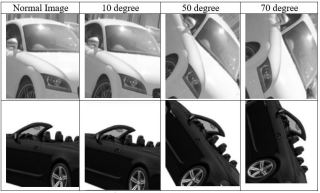

- You can add a rotation range in your ImageDataGenerator class by simply adding : 

        rotation_range=A_Value_From_0_To_360


**2. Random Shifts**

- ImageDataGenerator class has the argument height_shift_range for a vertical shift of image and width_shift_range for a horizontal shift of image. 

- width_shift and height_shift are ranges (as a fraction of total width or height) within which to randomly translate pictures vertically or horizontally

- You can add a width_shft or height_shift in your class by simply adding :  

        width_shift_range=A_Value_From_0_To_1, # horizontal shift
        height_shift_range=A_Value_From_0_To_1, # vertical shift

**3. Random Flips**

- Flipping images is also a great augmentation technique and it makes sense to use it with a lot of different objects.

- ImageDataGenerator class has parameters horizontal_flip and vertical_flip  for flipping along the vertical or the horizontal axis. However, this technique should be according to the object in the image. 


- You can add a horizontal_flip or vertical_flip in your class by simply adding:  

         horizontal_flip=True, # horizontal flip
         vertical_flip=True, # vertical flip

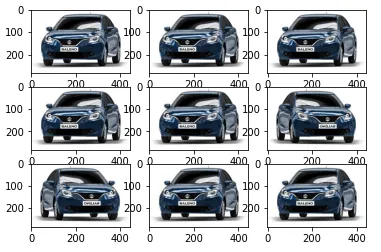

**4. Random Brightness**

- It randomly changes the brightness of the image. It is also a very useful augmentation technique because most of the time our object will not be under perfect lighting condition. So, it becomes imperative to train our model on images under different lighting conditions.

- Brightness can be controlled in the ImageDataGenrator class through the brightness_range argument. It accepts a list of two float values and picks a brightness shift value from that range. Values less than 1.0 darkens the image, whereas values above 1.0 brighten the image.

 - You can add brightness_range to your class by simply adding : 

        brightness_range=[YOUR_RANGE]

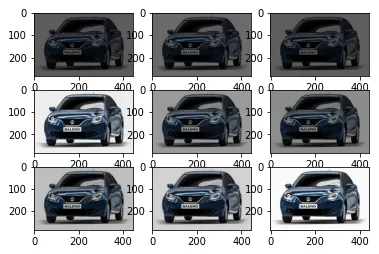

**5. Random Zoom**


- The zoom augmentation either randomly zooms in on the image or zooms out of the image.

- ImageDataGenerator class takes in a float value for zooming in the zoom_range argument. You could provide a list with two values specifying the lower and the upper limit. Else, if you specify a float value, then zoom will be done in the range [1-zoom_range,1+zoom_range].

- You can add zoom_range to your class by simply adding : 

        zoom_range=[YOUR_RANGE]

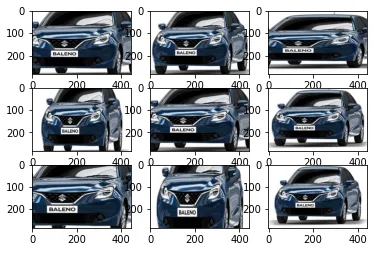

**6.Shear Intensity:**

- Shear Transformation is a process of slanting the image. It is different from the rotation because in rotation we will rotate the image but in shearing, we fix one axis and stretch the image in a certain angle known as the shearing angle. This is a sort of stretching which is not observed in rotation. The value of shear_range will be float which represents a Shear angle in a counter-clockwise direction in degrees.

- You can add shear_range in your class : 
        shear_range=YOUR_SHEAR_ANGLE

**7.Rescaling:**

- Rescale is a value by which we will multiply the data before any other processing. Our original images consist of RGB coefficients in the 0–255, but such values would be too high for our model to process (given a typical learning rate), so we target values between 0 and 1 instead of by scaling with a 1/255.

- You can add shear_range in your class :

        rescale=1./255

**ImageDataGenerator**

In [ ]:
#Define train and test datagen with ImageDataGenerator
train_datagen = ImageDataGenerator(
        rescale=1./255,
        shear_range=0.2,
        rotation_range=20.,
        width_shift_range=0.1,
        height_shift_range=0.1,
        zoom_range=[0.9, 1.25],
        brightness_range=[0.5, 1.5],
        horizontal_flip=True)

test_datagen = ImageDataGenerator(rescale=1./255)

**Flow_from_directory**
- The flow_from_directory() method allows you to read the images directly from the directory and augment them while the neural network model is learning on the training data.

- The method expects that images belonging to different classes are present in different folders but are inside the same parent folder.

- The directory must be set to the path where your ‘n’ classes of folders are present.
- The **target_size** is the size of your input images, every image will be resized to this size.
- **color_mode**: if the image is either black and white or grayscale set “grayscale” or if the image has three color channels, set “rgb”.
- **batch_size**: No. of images to be yielded from the generator per batch.
- **class_mode**: Set “binary” if you have only two classes to predict, if not set to“categorical”, in case if you’re developing an Autoencoder system, both input and the output would probably be the same image, for this case set to “input”.

In [ ]:
#Define train and test generator
train_generator=train_datagen.flow_from_directory(train_dir,
class_mode="categorical",
target_size=input_shape,
batch_size=batch_size)
validation_generator=test_datagen.flow_from_directory(test_dir,
class_mode="categorical",
target_size=input_shape,
batch_size=batch_size)

# **3-CNN-Model-Transfer Learning**

**1- Transfer Learning**

- Transfer learning models achieve optimal performance faster than the traditional ML models. It is because the models that leverage knowledge (features, weights, etc.) from previously trained models already understand the features. It makes it faster than training neural networks from scratc

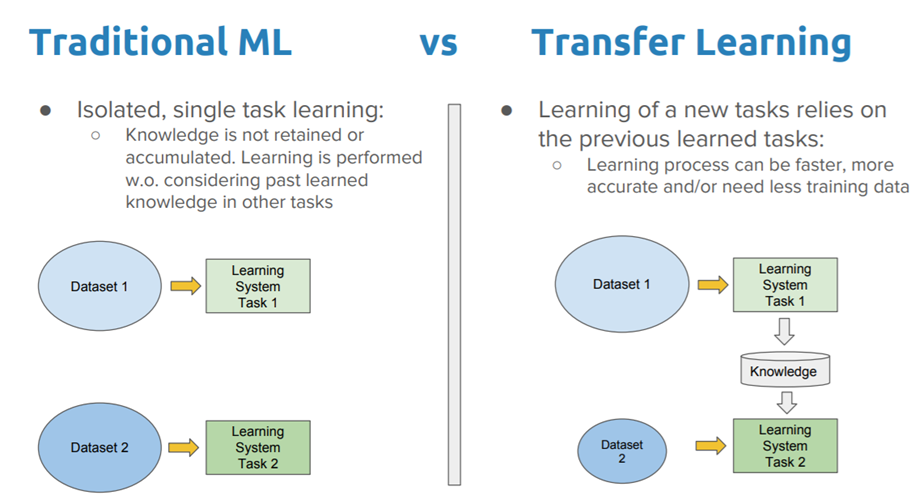

**Model Architechture** 

We describe our model as a set of a combination between
EfficientNet for compound scaling and MobileNet as
the model architecture. EfficientNet is a convolutional neural
network that relies on scaling the width, depth, and resolution uniformly. In addition to that, the network has a small
number of parameters compared to other models: it has only
12,320,535 parameters, but it has proven to reach better results
on the ImageNet dataset compared to other models with a
higher number of parameters. Thus, we transfer knowledge of
the trained EfficientNet model and use it in our system using
transfer learning. 

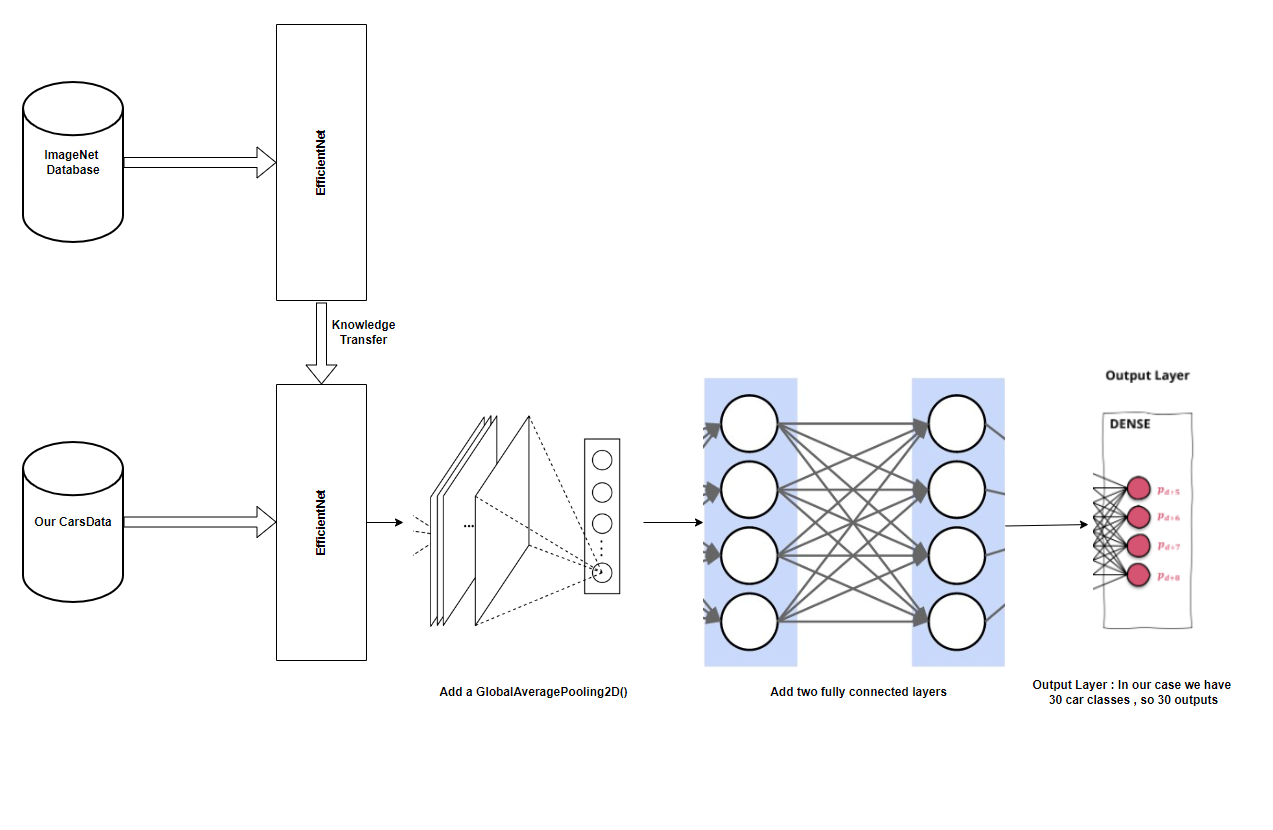

**EfficientNetB3 Architecture**

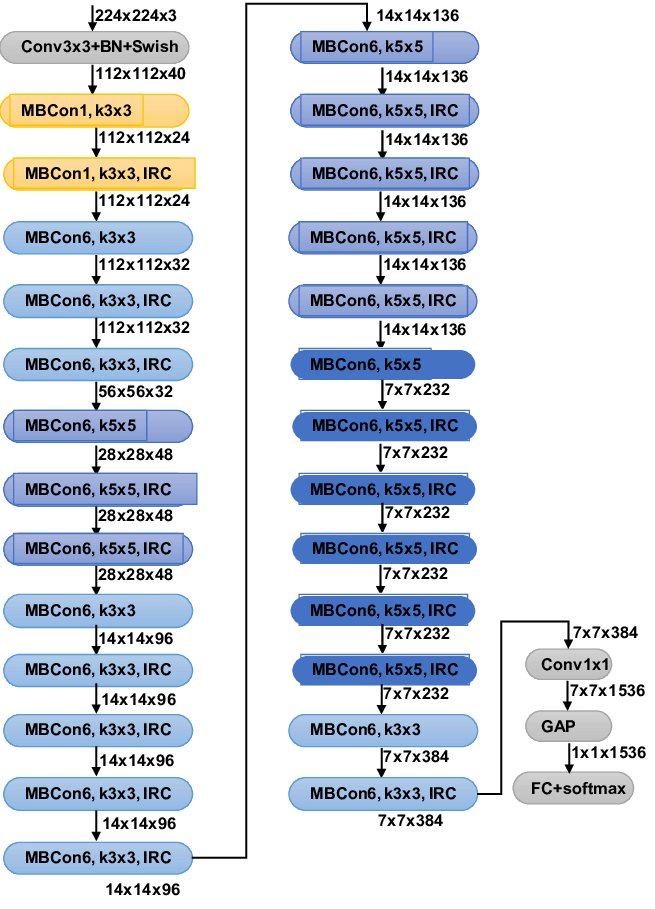

**Inverted Residual Block**

- An Inverted Residual Block, sometimes called an MBConv Block, is a type of residual block used for image models that uses an inverted structure for efficiency reasons. It was originally proposed for the MobileNetV2 CNN architecture. It has since been reused for several mobile-optimized CNNs.

- A traditional Residual Block has a wide -> narrow -> wide structure with the number of channels. The input has a high number of channels, which are compressed with a 1x1 convolution. The number of channels is then increased again with a 1x1 convolution so input and output can be added.

- In contrast, an Inverted Residual Block follows a narrow -> wide -> narrow approach, hence the inversion. We first widen with a 1x1 convolution, then use a 3x3 depthwise convolution (which greatly reduces the number of parameters), then we use a 1x1 convolution to reduce the number of channels so input and output can be added.

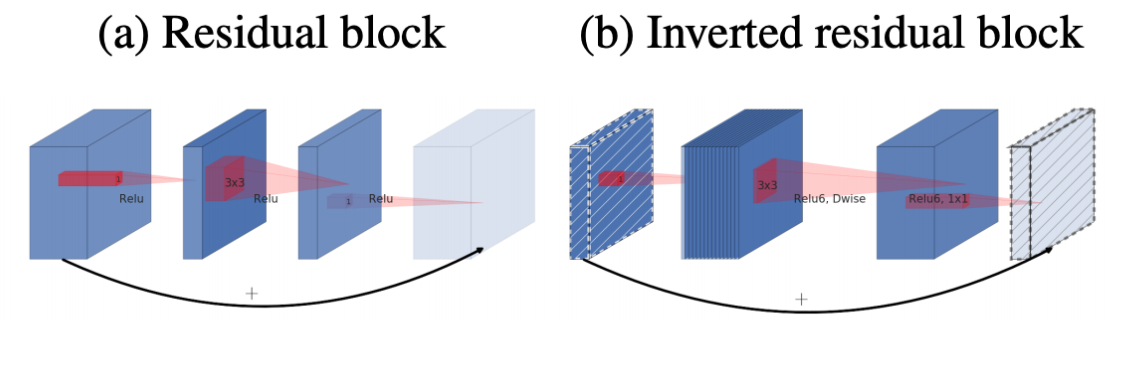

**Imports**

In [ ]:
!pip install -q keras
!pip install pyunpack
!pip install efficientnet

In [ ]:
import tensorflow as tf
import numpy as np
from tensorflow.keras.layers import Input, Dense, Dropout, GlobalAveragePooling2D,BatchNormalization
from keras import optimizers
import efficientnet.keras as efn
from keras.preprocessing import image
from keras import backend as K
from keras.models import model_from_json
from keras.optimizers import Nadam
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
import keras
from keras.models import load_model
from keras.optimizers import Adam
from tensorflow.keras.models import Model
from tensorflow.keras.preprocessing.image import ImageDataGenerator,load_img
import scipy.io as sio
import os

**Define The model**

Here we will take the EfficientNetB3 model pretrained on the imagenet dataset and we will transfer the learning to our new model by freezing the EfficientNetB3 model and creating a new model on top.

- **include_top**: Whether to include the fully-connected layer at the top of the network. Defaults to True.In our case we will set it to False since we are using transfer learning
- **weights**: One of None (random initialization), 'imagenet' (pre-training on ImageNet), or the path to the weights file to be loaded. Defaults to 'imagenet'.

In [ ]:
#First instantiate a base model with pre-trained weights.
base_model = efn.EfficientNetB3(weights='imagenet', include_top=False)


In [ ]:

#Create a new model on top.
#add a global spatial average pooling layer
x = base_model.output
x = GlobalAveragePooling2D()(x)
x = Dense(64,activation='relu')(x)
x = Dropout(0.4)(x)
x = Dense(32,activation='relu')(x)
x=BatchNormalization()(x)
predictions = Dense(30,activation='softmax')(x)
model = Model(inputs=base_model.input, outputs=predictions)
model.compile(optimizer='adam',
loss='categorical_crossentropy',metrics=['accuracy'])
model.summary()

**Compiling the model**

In [ ]:
model.compile(optimizer='adam',
loss='categorical_crossentropy',metrics=['accuracy'])

**Summary of the model**

In [ ]:
model.summary()

**Training The model**

- .fit_generator is used when either we have a huge dataset to fit into our memory or when data augmentation needs to be applied.

-  **generator**: a generator whose output must be a list of the form:
                      - (inputs, targets)    
                      - (input, targets, sample_weights)
a single output of the generator makes a single batch and hence all arrays in the list 
must be having the length equal to the size of the batch. The generator is expected 
to loop over its data infinite no. of times, it should never return or exit.

- **steps_per_epoch :** it specifies the total number of steps taken from the generator
 as soon as one epoch is finished and next epoch has started. We can calculate the value
of steps_per_epoch as the total number of samples in your dataset divided by the batch size.

- **Epochs :** an integer and number of epochs we want to train our model for.

- **Verbose :** specifies verbosity mode(0 = silent, 1= progress bar, 2 = one line per epoch).


- **validation_data**can be either:
                      - an inputs and targets list
                      - a generator
                      - an inputs, targets, and sample_weights list which can be used to evaluate
                        the loss and metrics for any model after any epoch has ended.

- **validation_steps**:only if the validation_data is a generator then only this argument
can be used. It specifies the total number of steps taken from the generator before it is 
stopped at every epoch and its value is calculated as the total number of validation data points
in your dataset divided by the validation batch size.

In [ ]:

history = model.fit(train_generator,
                    steps_per_epoch=train_generator.samples // batch_size + 1 ,
                    validation_data=validation_generator,
                    validation_steps=validation_generator.samples // batch_size + 1,
                    epochs=15,
                    verbose=1)

**Plot the Accuracy and the loss graphs**

In [ ]:
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()
# summarize history for loss
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

**Fine Tuning**

- Once your model has converged on the new data, you can try to unfreeze all or part of the base model and retrain the whole model end-to-end with a very low learning rate.

- This is an optional last step that can potentially give you incremental improvements. It could also potentially lead to quick overfitting -- keep that in mind.

- It is critical to only do this step after the model with frozen layers has been trained to convergence. If you mix randomly-initialized trainable layers with trainable layers that hold pre-trained features, the randomly-initialized layers will cause very large gradient updates during training, which will destroy your pre-trained features.

- It's also critical to use a very low learning rate at this stage, because you are training a much larger model than in the first round of training, on a dataset that is typically very small. As a result, you are at risk of overfitting very quickly if you apply large weight updates. Here, you only want to readapt the pretrained weights in an incremental way.

- This is how to implement fine-tuning of the whole base model:

**Unfreeze the base model**

In [ ]:
# Unfreeze the base model
base_model.trainable = True

**Compiling the model with a very low learning rate**

In [ ]:
# It's important to recompile your model after you make any changes
# to the `trainable` attribute of any inner layer, so that your changes
# are take into account
model.compile(optimizer=Adam(1e-5),  # Very low learning rate
              loss='categorical_crossentropy',
              metrics=['accuracy'])


**Retraining The model**

In [ ]:
# Train end-to-end
history = model.fit_generator(generator=train_generator,
                    steps_per_epoch=train_generator.samples // batch_size + 1 ,
                    validation_data=validation_generator,
                    validation_steps=validation_generator.samples // batch_size + 1,
                    epochs=10,
                    verbose=1)

**Save The Model**

In [ ]:
#Save the model
model.save('model.h5')